------------------------------------------------------------------------------------------------------------------------------

<h2>The Sparks Foundation: Computer Vision & Internet of Things</h2>

Submitted by: Vardan Gupta - Data Science & Business Analytics intern ( vardangupta00@gmail.com )

Batch: July 21

Task-6: Prediction using Decision Tree Algorithm(Level - Intermediate)

Description: Creating Decision Tree Model on the Basis of Data inside 'Iris.csv'

------------------------------------------------------------------------------------------------------------------------------

<b>Importing All The Required Libraries</b>

In [1]:
#Importing All The Required Libraries

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

<h3>Loading and Analysing the 'Test.png' Image File Data</h3>

The type of this input is <class 'numpy.ndarray'>
Shape: (244, 381, 3)


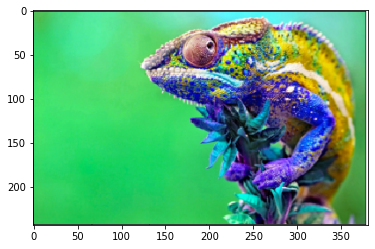

In [34]:
#Loading and Analysing the 'Test.png' Image File Data using OpenCV Functions
image = cv2.imread('IMAGES/Test.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)
plt.show()

<h3>BGR to RGB Image Conversion</h3>

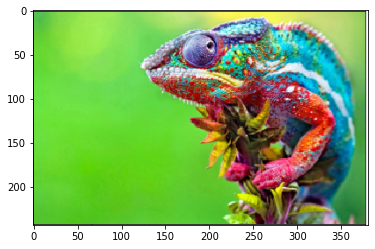

In [35]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

<h3>BGR to Grayscale Image Conversion</h3>

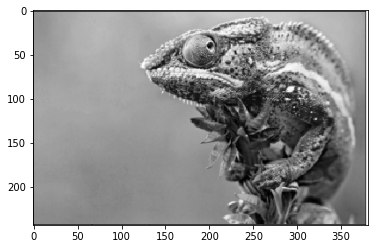

In [36]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

<h3>RBG to HEX Conversion Function</h3>

In [37]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

<h3>Function For Fetching Image in RGB Colorspace</h3>

In [38]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

<h3>Fetching Colors From Images</h3>

In [39]:
def get_colors(image, number_of_colors, show_chart):
    
 modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
 modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
 clf = KMeans(n_clusters = number_of_colors)
 labels = clf.fit_predict(modified_image)
    
 counts = Counter(labels)

 center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
 ordered_colors = [center_colors[i] for i in counts.keys()]
 hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
 rgb_colors = [ordered_colors[i] for i in counts.keys()]

 if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

 return rgb_colors

<h3>Image Dict For Further Color Searching</h3>

In [40]:
IMAGE_DIRECTORY = 'IMAGES'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED' : [255, 0, 0],
    'PURPLE' : [128, 0, 128]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

<h3>Plotting List Of Several Images</h3>

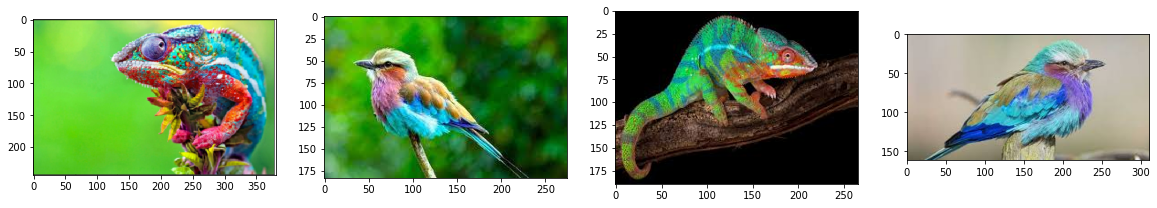

In [41]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

<h3>Function For Matching Image By Different Colors</h3>

In [42]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

<h3>Function For Showing Selected Images</h3>

In [43]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

<h3>Search Images Which Contain Purple Color</h3>

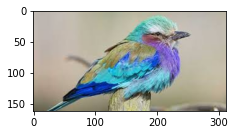

In [45]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['PURPLE'], 60, 5)

<h3>Search Images Which Contain Blue Color</h3>

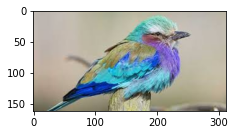

In [47]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

<h3>Search Images Which Contain Red Color</h3>

In [75]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

<Figure size 1440x720 with 0 Axes>

<b>i.e, No Picture with RED color</b>

<h3>Search Images Which Contain Green Color</h3>

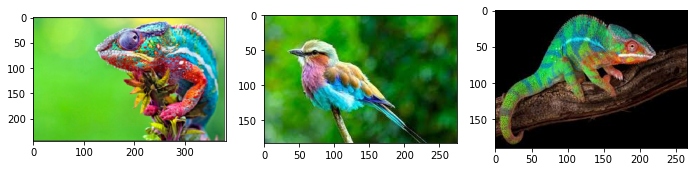

In [55]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

<h3>Search Images Which Contain Yellow Color</h3>

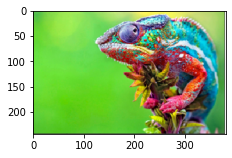

In [53]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

<h3>Get All Colors From Chameleons Image</h3>

[array([48.34684274, 29.85830298, 23.62295082]),
 array([43.1492517 , 65.5477551 , 87.75809524]),
 array([157.86188134, 183.63670608, 191.93659098]),
 array([187.73129898,  46.11125623,  41.33424365]),
 array([ 18.54397606, 137.82123341, 151.11644549]),
 array([176.35694401, 159.25765543,  20.5361893 ]),
 array([223.99047878, 231.48898259, 234.36289445]),
 array([ 18.90058309, 189.25233236, 207.50014577]),
 array([105.93416655, 219.34714965,  64.56992892]),
 array([141.58980832, 220.76874037,  89.13182441]),
 array([219.99953618, 110.62971552, 118.11672851]),
 array([204.90156906, 221.71501551, 113.77577084]),
 array([ 66.70189678, 142.19973533,  71.68760476]),
 array([ 93.8354667 , 205.39470823,  36.84324984]),
 array([123.50122112, 111.2754086 , 124.29579185]),
 array([114.24467327,  60.12842432,  41.85376595])]

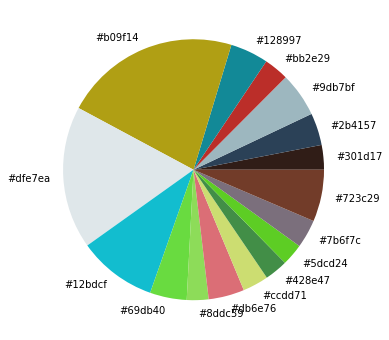

In [65]:
get_colors(get_image('IMAGES/Test.png'),16 , True)

<h3>Applying Some OpenCV functions</h3>

The type of this input is <class 'numpy.ndarray'>
Shape: (244, 381, 3)


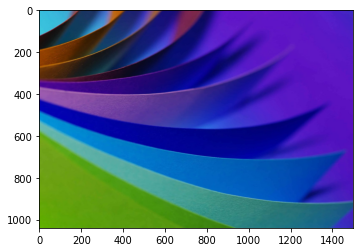

In [72]:
image1 = cv2.imread('IMAGES/ABC.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image1)
plt.show()

<h3>BGR to RGB Image Conversion</h3>

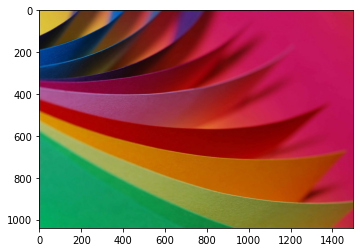

In [74]:

image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.show()

<h3>Get All Colors From Gems Image</h3>

[array([36.49522452, 21.11903065, 23.63905916]),
 array([199.25079201, 116.83039859,   4.18426287]),
 array([151.86803012,  51.70614571,  85.68264143]),
 array([119.72518314,  11.37466822,  23.06555898]),
 array([95.48506363, 48.71989283, 26.50180844]),
 array([ 17.06113801, 157.66858354,  92.92725989]),
 array([209.73914402, 172.78412996,  59.17931896]),
 array([15.48606107, 38.95220937, 76.05499716]),
 array([151.20640128,   4.83868251,   4.55505807]),
 array([165.24563061,  80.48905684, 133.05369233]),
 array([195.37273404,  24.60567653,  85.9512935 ]),
 array([182.48583507,  80.81279576,   5.5354912 ]),
 array([154.05032934, 167.05370714,  82.53766256]),
 array([171.78487169,  31.88975233,  44.42941801]),
 array([128.12864337, 121.0572257 ,  41.76339081]),
 array([ 38.98345784,  62.2588047 , 133.4850587 ])]

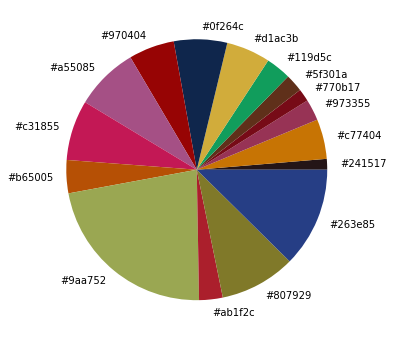

In [77]:
get_colors(get_image('IMAGES/ABC.png'),16 , True)